# Molecule sets and similarity example

Andrea Volkamer


## Working with Tables and csv Files

In [1]:
import pandas as pd
df = pd.read_csv('./data/EGFR-course.csv', delimiter=',', names=['Smiles', 'Name'], header=None)
df.head()

,Smiles,Name
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Gefitinib
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,Erlotinib
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,Lapatinib
3,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,Afatinib
4,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,Osimertinib


In [2]:
df.shape

(5, 2)

In [3]:
df.columns

Index(['Smiles', 'Name'], dtype='object')

,Name,ROMol
0,Gefitinib,
1,Erlotinib,
2,Lapatinib,
3,Afatinib,
4,Osimertinib,

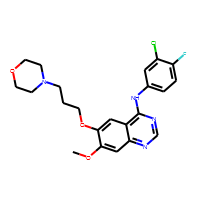
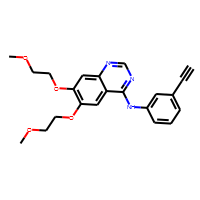
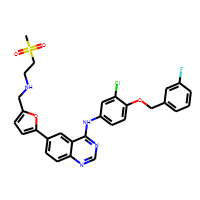
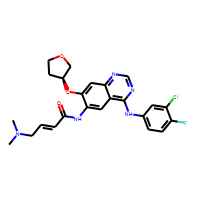
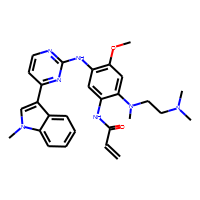

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, PandasTools

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Smiles')

# Draw molecules
df[['Name', 'ROMol']]

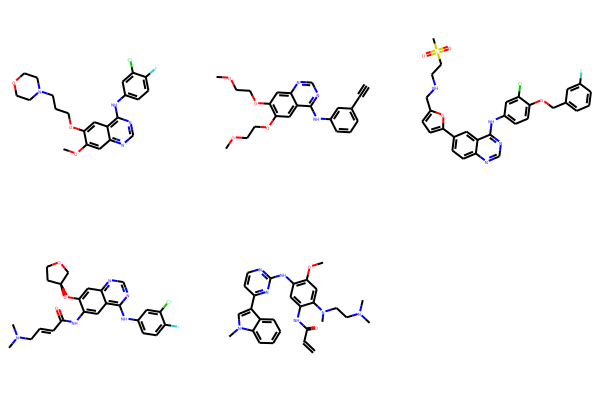

In [5]:
# Or
Draw.MolsToGridImage(list(df.ROMol), useSVG=True)

Add descriptor column to dataframe.

In [6]:
from rdkit.Chem import Descriptors
df['HeavyAtoms'] = df.apply(lambda x: Descriptors.HeavyAtomCount(Chem.MolFromSmiles(x['Smiles'])), axis=1)

,Smiles,Name,ROMol,HeavyAtoms
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Gefitinib,,31
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,Erlotinib,,29
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1,Lapatinib,,40
3,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1,Afatinib,,34
4,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(OC)cc1N(C)CCN(C)C,Osimertinib,,37

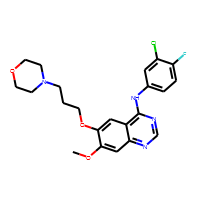
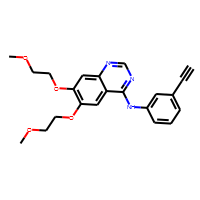
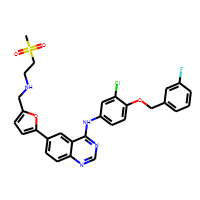
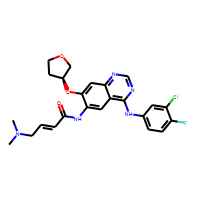
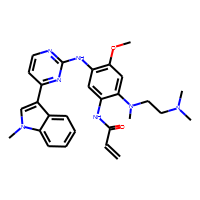

In [7]:
df.head()

## Molecular similarity

Find most similar compound - which one is the most similar one to Gefitinib?

In [8]:
from rdkit.Chem import AllChem

In [9]:
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs

# Generate fingerprints for the molecules
# By default the RDKit uses Morgan Fingerprints of radius 2 (MFP2)
fps = rdFingerprintGenerator.GetCountFPs(list(df.ROMol))

# Gefitinib as reference
fp1 = fps[0]
 
# Calculate similarity to reference
all_sim = DataStructs.BulkDiceSimilarity(fp1,fps)
df['sim2Gefitinib'] = all_sim            

,Smiles,Name,ROMol,HeavyAtoms,sim2Gefitinib
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Gefitinib,,31,1.000000
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,Erlotinib,,29,0.609195
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1,Lapatinib,,40,0.517073
3,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1,Afatinib,,34,0.641711
4,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(OC)cc1N(C)CCN(C)C,Osimertinib,,37,0.371134

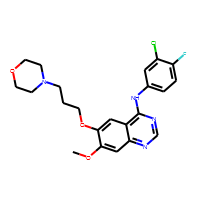
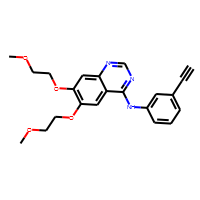
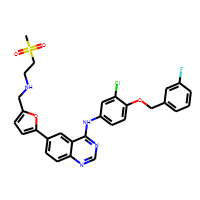
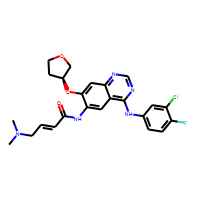
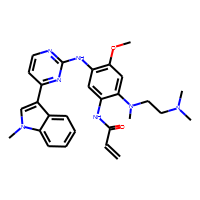

In [10]:
df.head()

In [11]:
df.sort_values(['sim2Gefitinib'], inplace=True, ascending=False)

,Smiles,Name,ROMol,HeavyAtoms,sim2Gefitinib
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Gefitinib,,31,1.000000
3,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1,Afatinib,,34,0.641711
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,Erlotinib,,29,0.609195
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1,Lapatinib,,40,0.517073
4,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(OC)cc1N(C)CCN(C)C,Osimertinib,,37,0.371134

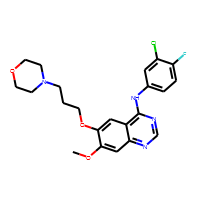
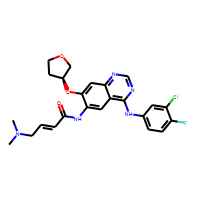
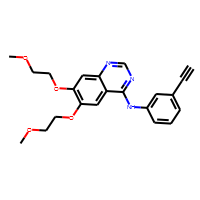
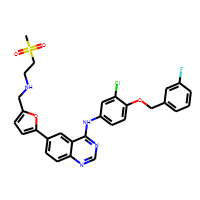
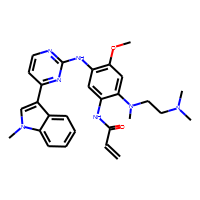

In [12]:
df.head()

In [13]:
# Save file
df.drop('ROMol', axis=1).to_csv('./data/mytest_csvFile.csv')